### Summary
This case study will analyse a dataset of data-related job listings from 2023 to find the most in-demand technical skills in New Zealand and Australia. Exploratory data analysis will be conducted in this notebook. Please refer to the included readme file for a detailed overview of the project. 


In [12]:
# Importing the required packages

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datasets import load_dataset

In [13]:
# Importing the data from the source (Huggingface)
dataset_dict = load_dataset('lukebarousse/data_jobs')
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})


In [14]:
# Retrieving the dataset from the 'train' key in the dictionary 
df = dataset_dict['train'].to_pandas()

In [15]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [16]:
df.describe()

,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [17]:
# Preview the dataset
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [18]:
# Dropping the duplicate rows 
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [19]:
# Converting the job_post_date into datetime type 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [20]:
# Assigning a name to the df index
df.index.name = 'job_index'

In [21]:
# Creating a new filtered dataset with job postings from New Zealand and Australia
df_anz = df[df['job_country'].isin(['Australia', 'New Zealand'])]
df_anz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15409 entries, 90 to 785687
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15409 non-null  object        
 1   job_title              15409 non-null  object        
 2   job_location           15408 non-null  object        
 3   job_via                15409 non-null  object        
 4   job_schedule_type      15280 non-null  object        
 5   job_work_from_home     15409 non-null  bool          
 6   search_location        15409 non-null  object        
 7   job_posted_date        15409 non-null  datetime64[ns]
 8   job_no_degree_mention  15409 non-null  bool          
 9   job_health_insurance   15409 non-null  bool          
 10  job_country            15409 non-null  object        
 11  salary_rate            189 non-null    object        
 12  salary_year_avg        102 non-null    float64       
 13  sala

In [22]:
df_anz.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,"['python', 'sql', 'r', 'java', 'bash', 'react'...","{'analyst_tools': ['tableau'], 'libraries': ['..."
267,Software Engineer,Senior Developer,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:52:02,True,False,New Zealand,None,NaN,NaN,New Zealand Government,"['python', 'ruby', 'ruby', 'sql', 'postgresql'...","{'cloud': ['redshift'], 'databases': ['postgre..."
311,Data Scientist,Geospatial Intelligence Analyst,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:51:37,True,False,New Zealand,None,NaN,NaN,Fire and Emergency New Zealand,"['python', 'sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."


In [23]:
# Resetting the index for df_anz
df_anz.reset_index(inplace = True)
df_anz.head()

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,90,Data Scientist,Data Scientist,Australia,via BeBee Australia,Full-time,False,Australia,2023-11-25 13:12:03,False,False,Australia,None,NaN,NaN,Concurrent Technologies Corporation,"['python', 'sql', 'r', 'java', 'bash', 'react'...","{'analyst_tools': ['tableau'], 'libraries': ['..."
1,267,Software Engineer,Senior Developer,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:52:02,True,False,New Zealand,None,NaN,NaN,New Zealand Government,"['python', 'ruby', 'ruby', 'sql', 'postgresql'...","{'cloud': ['redshift'], 'databases': ['postgre..."
2,311,Data Scientist,Geospatial Intelligence Analyst,"Wellington, New Zealand",via Jobs Trabajo.org,Full-time,False,New Zealand,2023-10-27 13:51:37,True,False,New Zealand,None,NaN,NaN,Fire and Emergency New Zealand,"['python', 'sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."
3,501,Software Engineer,Senior Engineer - Platform Engineering,"Sydney NSW, Australia",via LinkedIn,Full-time,False,Australia,2023-04-01 13:10:30,False,False,Australia,None,NaN,NaN,Slalom Build,"['aws', 'chef', 'puppet', 'ansible', 'terraform']","{'cloud': ['aws'], 'other': ['chef', 'puppet',..."
4,758,Senior Data Engineer,Senior Data Engineer,"Sydney NSW, Australia",via Trabajo.org,Full-time,False,Australia,2023-03-18 13:15:07,True,False,Australia,None,NaN,NaN,Mirvac,"['aws', 'snowflake', 'azure']","{'cloud': ['aws', 'snowflake', 'azure']}"


In [24]:
# Locations of job postings 
df_anz['search_location'].value_counts()

search_location
Australia      12948
New Zealand     2461
Name: count, dtype: int64

In [25]:
# Number of data analyst jobs in the database for each location 
anz_data_analyst = df_anz[(df_anz['job_title_short'] == 'Data Analyst') | (df['job_title_short'] == 'Data Scientist')]
anz_data_analyst['search_location'].value_counts()

C:\Users\gayan\AppData\Local\Temp\ipykernel_25052\605541331.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anz_data_analyst = df_anz[(df_anz['job_title_short'] == 'Data Analyst') | (df['job_title_short'] == 'Data Scientist')]


search_location
Australia      4019
New Zealand     920
Name: count, dtype: int64

In [26]:
# Breakdown of the job listings numbers according to job title
job_title_counts = df_anz['job_title_short'].value_counts().to_frame()
job_title_counts

,count
job_title_short,
Data Engineer,5067
Data Analyst,2202
Software Engineer,1875
Senior Data Engineer,1660
Data Scientist,1511
Business Analyst,1227
Cloud Engineer,556
Senior Data Analyst,485
Senior Data Scientist,418


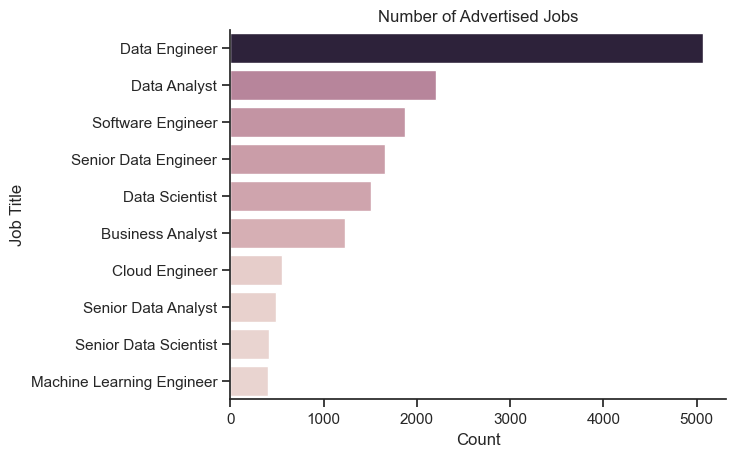

In [27]:
sns.set_theme(style = 'ticks')
sns.barplot(data=job_title_counts, x='count', y='job_title_short', hue = 'count', legend = False)
sns.despine()  
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.title("Number of Advertised Jobs")
plt.show()

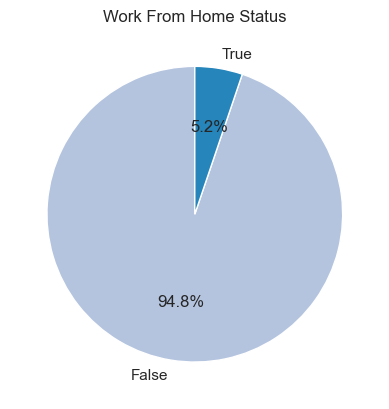

In [28]:
# How many of the jobs offer at least some work from home?
pie_chart = df_anz ['job_work_from_home'].value_counts()
colors = sns.color_palette("PuBu", len(pie_chart))
pie_chart.plot(kind= 'pie', colors = colors, startangle = 90, autopct ='%1.1f%%')
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()


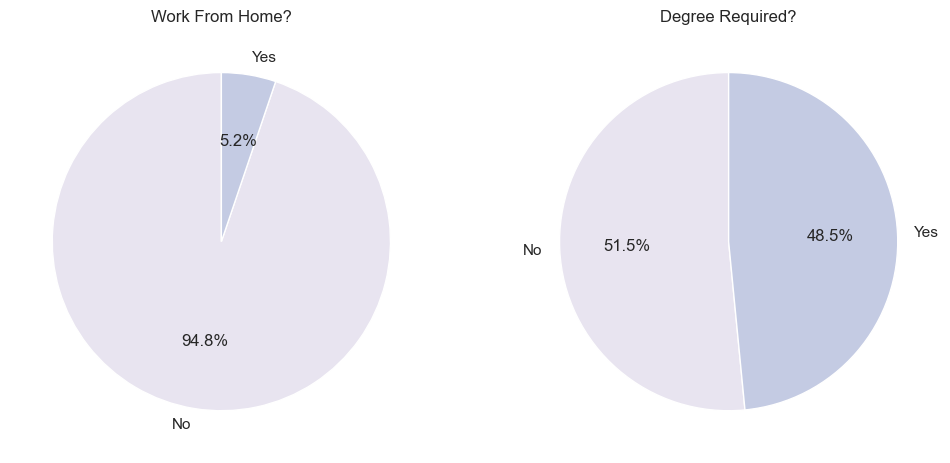

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))  # Set the figure size to double

column_dict = {
    'job_work_from_home': 'Work From Home?',
    'job_no_degree_mention': 'Degree Required?'
}

for i, (column, title) in enumerate(column_dict.items()):
    ax[i].pie(df_anz[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['No', 'Yes'], colors=sns.color_palette("PuBu"))
    ax[i].set_title(title)

plt.show()

In [30]:
df_anz_cleaned = df_anz.copy()
df_anz_cleaned['job_skills_cleaned'] = df_anz['job_skills'].apply(lambda x: x if isinstance(x, list) else [])

In [31]:
import ast

def clean_list (skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
    
df_anz_cleaned['job_skills_cleaned'] = df_anz_cleaned['job_skills_cleaned'].apply(clean_list)

C:\Users\gayan\AppData\Local\Temp\ipykernel_25052\1417497077.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if pd.notna(skill_list):


In [32]:
type(df_anz_cleaned['job_skills'][2000])

str

In [33]:
print(df_anz_cleaned['job_skills'].dtype)

object


In [34]:
non_list_count = df_anz_cleaned['job_skills_cleaned'].apply(lambda x: not isinstance(x, list)).sum()

print(f"Number of non-list items in 'job_skills_cleaned': {non_list_count}")

Number of non-list items in 'job_skills_cleaned': 15409


In [35]:
# Filter for non-list items in 'job_skills'
non_list_items = df_anz['job_skills'][~df_anz['job_skills'].apply(lambda x: isinstance(x, list))]

# Check if all non-list items are None or NaN
all_none_or_nan = non_list_items.apply(lambda x: pd.isna(x)).all()

print(f"Are all non-list items None or NaN? {all_none_or_nan}")

Are all non-list items None or NaN? False


In [36]:
df_anz.sample(5)

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
12452,655035,Senior Data Engineer,Senior Engineer - Data Services,"Melbourne VIC, Australia",via Startup Jobs,Full-time,False,Australia,2023-07-18 10:45:35,True,False,Australia,None,NaN,NaN,Culture Amp,"['ruby', 'ruby', 'go', 'java', 'kotlin', 'aws'...","{'cloud': ['aws'], 'libraries': ['kafka'], 'pr..."
8230,363284,Data Engineer,Technical Support Analyst - Tier 1,Anywhere,via Recruit.net,Full-time,True,Australia,2023-01-05 23:39:17,True,False,Australia,None,NaN,NaN,"Bullhorn, Inc.","['sql', 'sql server', 'zoom', 'slack']","{'databases': ['sql server'], 'programming': [..."
1674,78195,Data Analyst,Data Analyst - 12 month Fixed Term,New Zealand,via LinkedIn,Full-time,False,New Zealand,2023-01-23 00:56:18,True,False,New Zealand,None,NaN,NaN,Fisher & Paykel Healthcare,"['power bi', 'dax']","{'analyst_tools': ['power bi', 'dax']}"
1466,72048,Data Engineer,Gcp Data Engineer,"New South Wales, Australia",via Jobrapido.com,Full-time,False,Australia,2023-04-09 00:28:01,False,False,Australia,None,NaN,NaN,Pravallika B - Senior Recruitment Consultant -...,"['sql', 'gcp', 'bigquery', 'oracle', 'linux', ...","{'cloud': ['gcp', 'bigquery', 'oracle'], 'os':..."
11126,564564,Software Engineer,IT Systems Engineer (T-SQL Focused),"Gold Coast QLD, Australia",via LinkedIn,Contractor,False,Australia,2023-05-31 04:22:01,False,False,Australia,None,NaN,NaN,Randstad Technologies Australia,"['t-sql', 'powershell', 'javascript', 'azure',...","{'cloud': ['azure'], 'os': ['windows'], 'progr..."


In [37]:
df_anz.isna().sum()

job_index                    0
job_title_short              0
job_title                    0
job_location                 1
job_via                      0
job_schedule_type          129
job_work_from_home           0
search_location              0
job_posted_date              0
job_no_degree_mention        0
job_health_insurance         0
job_country                  0
salary_rate              15220
salary_year_avg          15307
salary_hour_avg          15327
company_name                 0
job_skills                2421
job_type_skills           2421
dtype: int64

In [38]:
df_anz.describe()

,job_index,job_posted_date,salary_year_avg,salary_hour_avg
count,15409.000000,15409,102.000000,82.000000
mean,375821.996236,2023-07-05 14:11:40.200662016,115686.892157,23.707317
min,90.000000,2023-01-01 00:12:47,20000.000000,20.000000
25%,150087.000000,2023-03-27 00:19:31,86068.250000,20.000000
50%,350799.000000,2023-07-24 16:22:40,110500.000000,20.000000
75%,592474.000000,2023-10-13 08:33:52,147500.000000,20.000000
max,785687.000000,2023-12-31 16:07:17,257500.000000,175.000000
std,237439.583295,NaN,43969.229395,20.278607
